In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
df = pd.read_csv('../data/df_agg_all_with_factors.csv')
df = df.groupby('city', as_index=False).agg(np.mean)
df = df[df['r2'] > 0.6].reset_index(drop=True)
print(len(df))

672


In [3]:
nb_class = 6
breaks = [np.min(df['wi_mean']), 0, 5, 10, 20, 40, np.max(df['wi_mean'])]
df['wi_level'] = pd.cut(df['wi_mean'], bins=breaks, labels=np.arange(1, nb_class+1, 1), include_lowest=True)

nb_class = 5
breaks = [np.min(df['wi_trend_slope']), 0, 2, 4, 6, np.max(df['wi_trend_slope'])]
df['wi_trend_level'] = pd.cut(df['wi_trend_slope'], bins=breaks, labels=np.arange(1, nb_class+1, 1), include_lowest=True)

In [4]:
wi_color_dict = {1: 'brown', 2: '#CCFFCC', 3: 'lightgreen', 4: '#95CA48', 5: '#57B981', 6: 'green'}
wi_trend_color_dict = {1: 'brown', 2: 'lightgreen', 3: '#95CA48', 4: '#57B981', 5: 'green'}

In [5]:
def read_cz_map():
    filename = './Beck_KG_V1_present_0p083.tif'
    data = xr.open_rasterio(filename)
    return data
cz_map = read_cz_map()

## The map of indirect impacts for all cities

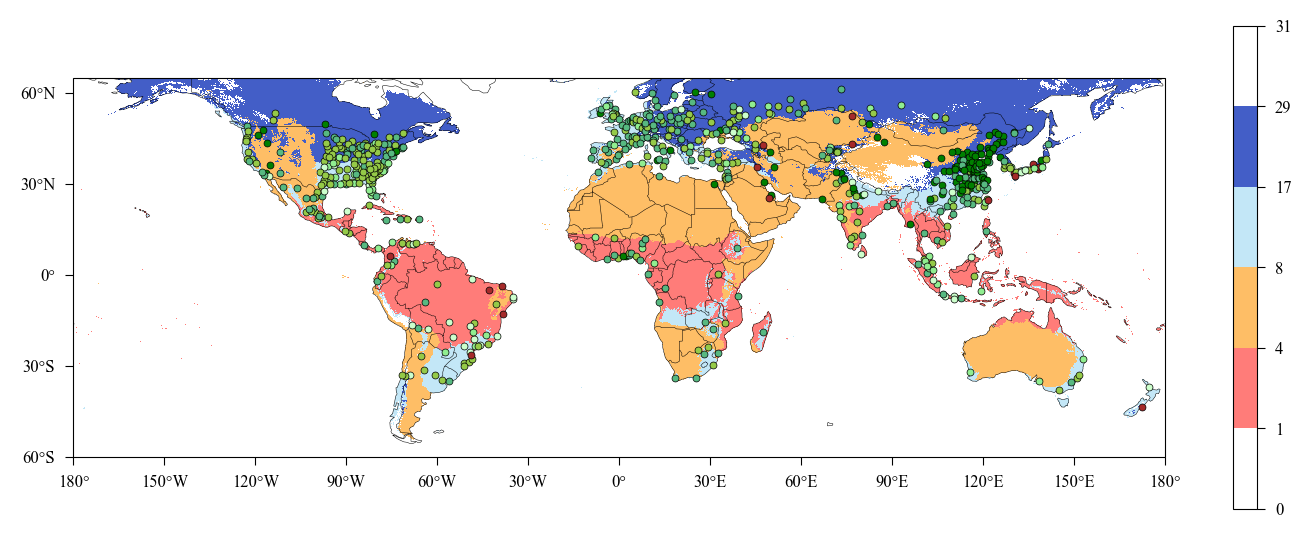

In [6]:
dpi = 200
font_size = 6
plt.rc('font', family='Times New Roman', size=font_size)
linewidth = 0.4
plt.rcParams['axes.linewidth'] = linewidth
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = linewidth

fig = plt.figure(figsize=(8.8, 3.2), dpi=dpi, linewidth=0.1)
map_proj = ccrs.PlateCarree()
ax = fig.add_subplot(111, projection=map_proj)

levels = [0, 1, 4, 8, 17, 29, 31]
cz_colors = ['white', '#FF7C79', '#FEBE66', '#C3E7F7', '#435EC7', 'white']
cz_map.plot(ax=ax, levels=levels, colors=cz_colors)

ax.coastlines(linewidth=0.18)
ax.add_feature(cfeature.BORDERS, linewidth=0.18)

for i in range(len(df)):
    loc_x = df['loc_x'][i]
    loc_y = df['loc_y'][i]
    ax.plot(loc_x, loc_y, marker='o', transform=map_proj, markerfacecolor=wi_color_dict[df['wi_level'][i]], markersize=2.5, markeredgecolor='black', markeredgewidth=0.25)

ax.set_global()
ax.set_xticks(np.arange(-180, 180 + 60, 60), crs=map_proj)
ax.set_xticks(np.arange(-180, 180 + 30, 30), minor=False, crs=map_proj)
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=map_proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.ylim(-60, 65)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

## The map of trends of indirect impact for all cities

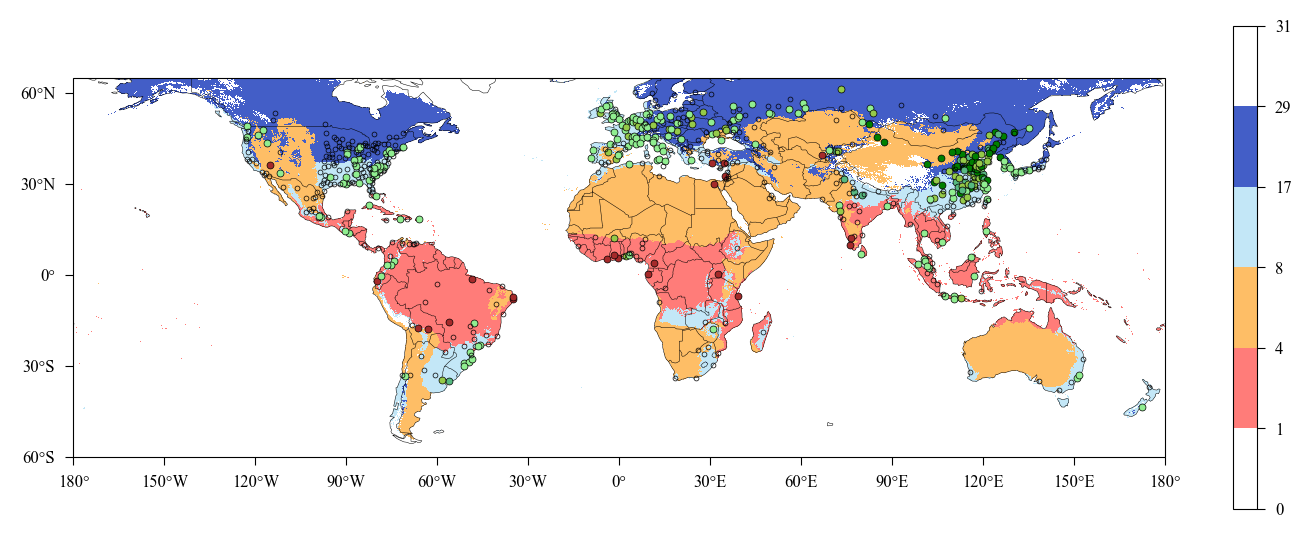

In [7]:
dpi = 200
font_size = 6
plt.rc('font', family='Times New Roman', size=font_size)
linewidth = 0.4
plt.rcParams['axes.linewidth'] = linewidth
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = linewidth

fig = plt.figure(figsize=(8.8, 3.2), dpi=dpi, linewidth=0.1)
map_proj = ccrs.PlateCarree()
ax = fig.add_subplot(111, projection=map_proj)

levels = [0, 1, 4, 8, 17, 29, 31]
cz_colors = ['white', '#FF7C79', '#FEBE66', '#C3E7F7', '#435EC7', 'white']
cz_map.plot(ax=ax, levels=levels, colors=cz_colors)

ax.coastlines(linewidth=0.18)
ax.add_feature(cfeature.BORDERS, linewidth=0.18)

for i in range(len(df)):
    loc_x = df['loc_x'][i]
    loc_y = df['loc_y'][i]
    if df['wi_trend_p'][i] < 0.05:
        ax.plot(loc_x, loc_y, marker='o', transform=map_proj, markerfacecolor=wi_trend_color_dict[df['wi_trend_level'][i]], markersize=2.5, markeredgecolor='black', markeredgewidth=0.25)
    else:
        ax.plot(loc_x, loc_y, marker='o', transform=map_proj, markerfacecolor='none', markersize=2.5*0.7, markeredgecolor='black', markeredgewidth=0.25)

ax.set_global()
ax.set_xticks(np.arange(-180, 180 + 60, 60), crs=map_proj)
ax.set_xticks(np.arange(-180, 180 + 30, 30), minor=False, crs=map_proj)
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=map_proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.ylim(-60, 65)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()